# Problem Statement

# Filter Warnings 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read Dataset

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("F:/Course/ML/DL/18_Project/training_set (2).csv")
test = pd.read_csv("F:/Course/ML/DL/18_Project/testing_set (1).csv")

In [4]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Missing data treatment

In [8]:
from ml_functions import replacer,chisq,outliers,preprocessing,standardize,catconsep,ANOVA

In [9]:
replacer(train)
replacer(test)

In [10]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Finding unsual data in data set

In [12]:
for i in train.columns:
    print(train[i].value_counts())

LP001333    1
LP002398    1
LP002263    1
LP002625    1
LP001027    1
           ..
LP002524    1
LP002868    1
LP002863    1
LP001310    1
LP001811    1
Name: Loan_ID, Length: 614, dtype: int64
Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
2500.0    9
2600.0    6
6000.0    6
3750.0    5
5000.0    5
         ..
6133.0    1
2058.0    1
2787.0    1
6256.0    1
5829.0    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
3447.0      1
688.0       1
2669.0      1
189.0       1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     

Only column "Dependents" have a unsual value of 3+ 

In [13]:
 for i in test.columns:
    print(test[i].value_counts())

LP002245    1
LP002192    1
LP002450    1
LP002442    1
LP001921    1
           ..
LP001466    1
LP002279    1
LP002806    1
LP001878    1
LP001662    1
Name: Loan_ID, Length: 367, dtype: int64
Male      297
Female     70
Name: Gender, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64
0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
No     330
Yes     37
Name: Self_Employed, dtype: int64
5000    6
3500    6
3333    5
4333    4
2500    4
       ..
2412    1
5293    1
3125    1
6825    1
3583    1
Name: ApplicantIncome, Length: 314, dtype: int64
0       156
2000      3
700       3
1083      2
1517      2
       ... 
4309      1
2774      1
3803      1
2845      1
3333      1
Name: CoapplicantIncome, Length: 194, dtype: int64
150.0    12
125.0    11
110.0    10
90.0      9
187.0     9
         ..
68.0      1
159.0     1
155.0     1
257.0     1
234.0     1
Name: LoanAmount, Length: 145

Only column "Dependents" have a unsual value of 3+

# Replacing unsual values from both dataset

In [14]:
train["Dependents"] = train["Dependents"].replace(["3+"], 4)
test["Dependents"] = test["Dependents"].replace(["3+"], 4)

In [15]:
train["Dependents"].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [16]:
test["Dependents"].value_counts()

0    210
2     59
1     58
4     40
Name: Dependents, dtype: int64

# Define X and Y

In [17]:
Y = train["Loan_Status"]
X = train.drop(labels=["Loan_ID","Loan_Status"],axis = 1)

In [18]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,4,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban


In [19]:
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [20]:
cat,con = catconsep(X)

In [21]:
Xnew = preprocessing(X)

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state =21)

# First model using Decision Tree

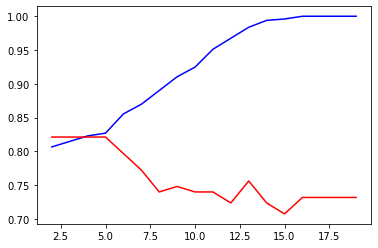

In [23]:
tr = []
ts = []
from sklearn.tree import DecisionTreeClassifier


for i in range(2,20,1): 
    dtc = DecisionTreeClassifier(criterion="entropy", random_state = 21, max_depth = i)
    model1 = dtc.fit(xtrain,ytrain)
    pred_tr1 = model1.predict(xtrain)
    pred_ts1 = model1.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr1_acc = accuracy_score(ytrain,pred_tr1)
    ts1_acc = accuracy_score(ytest,pred_ts1)
    tr.append(tr1_acc)
    ts.append(ts1_acc)


import matplotlib.pyplot as plt 
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

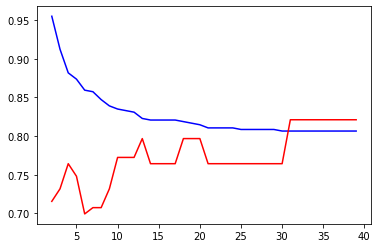

In [24]:
tr = []
ts = []
from sklearn.tree import DecisionTreeClassifier


for i in range(2,40,1): 
    dtc = DecisionTreeClassifier(criterion="entropy", random_state = 21, min_samples_leaf = i)
    model1 = dtc.fit(xtrain,ytrain)
    pred_tr1 = model1.predict(xtrain)
    pred_ts1 = model1.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr1_acc = accuracy_score(ytrain,pred_tr1)
    ts1_acc = accuracy_score(ytest,pred_ts1)
    tr.append(tr1_acc)
    ts.append(ts1_acc)


import matplotlib.pyplot as plt 
plt.plot(range(2,40,1),tr,c="blue")
plt.plot(range(2,40,1),ts,c="red")

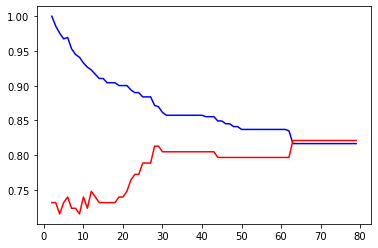

In [25]:
tr = []
ts = []
from sklearn.tree import DecisionTreeClassifier


for i in range(2,80,1): 
    dtc = DecisionTreeClassifier(criterion="entropy", random_state = 21, min_samples_split = i)
    model1 = dtc.fit(xtrain,ytrain)
    pred_tr1 = model1.predict(xtrain)
    pred_ts1 = model1.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr1_acc = accuracy_score(ytrain,pred_tr1)
    ts1_acc = accuracy_score(ytest,pred_ts1)
    tr.append(tr1_acc)
    ts.append(ts1_acc)


import matplotlib.pyplot as plt 
plt.plot(range(2,80,1),tr,c="blue")
plt.plot(range(2,80,1),ts,c="red")

In [26]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state = 21, max_depth = 4)
model1 = dtc.fit(xtrain,ytrain)
pred_tr1 = model1.predict(xtrain)
pred_ts1 = model1.predict(xtest)

from sklearn.metrics import accuracy_score
tr1_acc = accuracy_score(ytrain,pred_tr1)
ts1_acc = accuracy_score(ytest,pred_ts1)               

In [27]:
tr1_acc

0.8228105906313645

In [28]:
ts1_acc

0.8211382113821138

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr1))
print(confusion_matrix(ytest,pred_ts1))

[[ 69  85]
 [  2 335]]
[[19 19]
 [ 3 82]]


# Second model using RandomForest

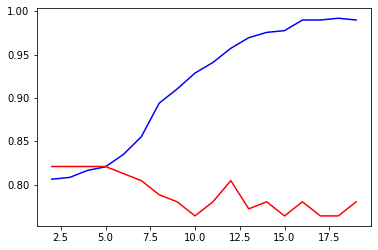

In [30]:
tr1 = []
ts1 = []

for  i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=21,max_depth=i)
    model2 = rfc.fit(xtrain,ytrain)
    pred_tr2 = model2.predict(xtrain)
    pred_ts2 = model2.predict(xtest)
    tr2_acc = accuracy_score(ytrain,pred_tr2)
    ts2_acc = accuracy_score(ytest,pred_ts2)
    tr1.append(tr2_acc)
    ts1.append(ts2_acc)

plt.plot(range(2,20,1),tr1,c="blue")
plt.plot(range(2,20,1),ts1,c="red")

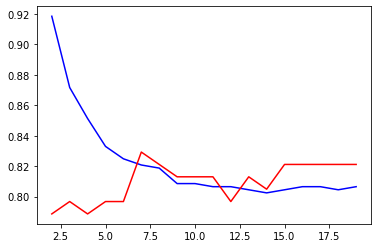

In [31]:
tr1 = []
ts1 = []

for  i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20, criterion="entropy",random_state=21,min_samples_leaf=i)
    model2 = rfc.fit(xtrain,ytrain)
    pred_tr2 = model2.predict(xtrain)
    pred_ts2 = model2.predict(xtest)
    tr2_acc = accuracy_score(ytrain,pred_tr2)
    ts2_acc = accuracy_score(ytest,pred_ts2)
    tr1.append(tr2_acc)
    ts1.append(ts2_acc)

plt.plot(range(2,20,1),tr1,c="blue")
plt.plot(range(2,20,1),ts1,c="red")

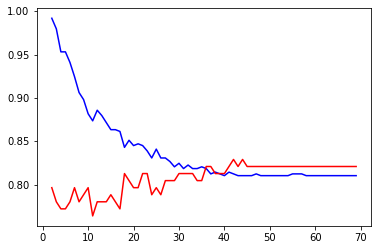

In [32]:
tr1 = []
ts1 = []

for  i in range(2,70,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20, criterion="entropy",random_state=21,min_samples_split=i)
    model2 = rfc.fit(xtrain,ytrain)
    pred_tr2 = model2.predict(xtrain)
    pred_ts2 = model2.predict(xtest)
    tr2_acc = accuracy_score(ytrain,pred_tr2)
    ts2_acc = accuracy_score(ytest,pred_ts2)
    tr1.append(tr2_acc)
    ts1.append(ts2_acc)

plt.plot(range(2,70,1),tr1,c="blue")
plt.plot(range(2,70,1),ts1,c="red")

In [33]:
rfc = RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=21,max_depth=5)
model2 = rfc.fit(xtrain,ytrain)
pred_tr2 = model2.predict(xtrain)
pred_ts2 = model2.predict(xtest)
tr2_acc = accuracy_score(ytrain,pred_tr2)
ts2_acc = accuracy_score(ytest,pred_ts2)

In [34]:
print(tr2_acc)

0.8207739307535642


In [35]:
print(ts2_acc)

0.8211382113821138


In [36]:
print(confusion_matrix(ytrain,pred_tr2))
print(confusion_matrix(ytest,pred_ts2))

[[ 68  86]
 [  2 335]]
[[19 19]
 [ 3 82]]


# Thrid model using Logistic Reression

In [37]:
imp_cols = []
pvals = []

for i in X.columns:
    if (X[i].dtypes == "object"):
        pval = chisq(train,"Loan_Status",i)
        pvals.append(pval)
    else:
        pval = ANOVA(train,"Loan_Status",i)
        pvals.append(pval)

In [38]:
W = pd.DataFrame([X.columns,pvals]).T

In [39]:
W.columns=("col","pval")

In [40]:
W

,col,pval
0,Gender,0.73915
1,Married,0.02961
2,Dependents,0.36887
3,Education,0.0431
4,Self_Employed,0.97107
5,ApplicantIncome,0.90252
6,CoapplicantIncome,0.14239
7,LoanAmount,0.36769
8,Loan_Amount_Term,0.60396
9,Credit_History,0.0


In [41]:
W[W.pval<0.05]

,col,pval
1,Married,0.02961
3,Education,0.0431
9,Credit_History,0.0
10,Property_Area,0.00214


In [42]:
X1 = X

In [43]:
X1 =X1.drop(labels=["Gender","Dependents","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [44]:
X1

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban
...,...,...,...,...
609,No,Graduate,1.0,Rural
610,Yes,Graduate,1.0,Rural
611,Yes,Graduate,1.0,Urban
612,Yes,Graduate,1.0,Urban


In [45]:
X1new =preprocessing(X1)

In [46]:
xtrain,xtest,ytrain,ytest =train_test_split(X1new,Y,random_state=21,test_size=0.2)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model3 =lr.fit(xtrain,ytrain)
pred_tr3 = model3.predict(xtrain)
pred_ts3 = model3.predict(xtest)

In [48]:
print(round(accuracy_score(ytrain,pred_tr3),4))
print(round(accuracy_score(ytest,pred_ts3),4))

0.8065
0.813


In [49]:
print(confusion_matrix(ytrain,pred_tr3))
print(confusion_matrix(ytest,pred_ts3))

[[ 63  91]
 [  4 333]]
[[19 19]
 [ 4 81]]


In [50]:
pred_ts3

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

# Fourth model using Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model4 = nb.fit(xtrain,ytrain)
pred_tr4 = model4.predict(xtrain)
pred_ts4 = model4.predict(xtest)

tr4_acc = accuracy_score(ytrain,pred_tr4)
ts4_acc = accuracy_score(ytest,pred_ts4)

print("Training Accuracy : ", round(tr4_acc,4))
print("Testing Accuracy : ", round(ts4_acc,4))

Training Accuracy :  0.8045
Testing Accuracy :  0.7805


# Preparing Test data

In [52]:
Xtest = test.drop(labels="Loan_ID", axis = 1)
cat_test,con_test=catconsep(Xtest)
Xtest_new = preprocessing(Xtest)

In [53]:
Xtest_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.380077,0.270603,0.47918,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.347216,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
364,-0.317211,0.181644,-0.166482,0.270603,0.00000,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
365,0.039641,0.353241,0.359289,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [54]:
pred_test = model1.predict(Xtest_new)

In [55]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [56]:
T = test[["Loan_ID"]]
T["Loan_Status"] = pred_test

In [57]:
T

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
#T.to_csv("Desktop/Loan_Prediction.csv")